# Converting files from dcim to jpg


The following lines are used to dowload the dcim images of the dataset, convert them to jpg format and scale them to a size of 512 pixels in width keeping the aspect ratio of the original image

In [3]:
!pip install pydicom --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.4 MB/s eta 0:00:00


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
import shutil
import pandas as pd
import pydicom
from PIL import Image
import numpy as np


train_folder = "/content/drive/MyDrive/DP4_final/train"
test_folder = "/content/drive/MyDrive/DP4_final/test"

if not os.path.exists(train_folder):
    os.makedirs(train_folder)
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

def convert_dcm_to_jpg(file_path, output_folder, processed_files, total_files):
    ds = pydicom.dcmread(file_path)
    img = ds.pixel_array
    img = (img / img.max()) * 255
    img = img.astype(np.uint8)
    img = Image.fromarray(img)
    width_percent = (512/float(img.size[0]))
    new_height = int((float(img.size[1])*float(width_percent)))
    img = img.resize((512, new_height), Image.ANTIALIAS)
    new_filename = os.path.splitext(os.path.basename(file_path))[0] + '.jpg'
    new_file_path = os.path.join(output_folder, new_filename)
    img.save(new_file_path)

    print(f'Successfully converted image {processed_files} of {total_files} and saved as {new_file_path}')


df = pd.read_csv('/content/drive/MyDrive/DP4/train.csv')
total_files = len(os.listdir('/content/drive/MyDrive/DP4/train'))

In [16]:
processed_files = 0

for index, row in df.iterrows():
    image_name = str(row[0]) + '.dcm'
    class_name = str(row[1])

    class_folder = os.path.join(train_folder, class_name)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    if os.path.exists(f'/content/drive/MyDrive/DP4/train/{image_name}'):
        file_path = f'/content/drive/MyDrive/DP4/train/{image_name}'
    else:
        print(f'File {image_name} not found in train folder. Skipping...')
        continue

    processed_files += 1
    convert_dcm_to_jpg(file_path, class_folder, processed_files, total_files)


total_files = len(os.listdir('/content/drive/MyDrive/DP4/test'))
processed_files = 0

for filename in os.listdir('/content/drive/MyDrive/DP4/test'):
    if filename.endswith(".dcm"):
        file_path = os.path.join('/content/drive/MyDrive/DP4/test', filename)
        processed_files += 1
        convert_dcm_to_jpg(file_path, test_folder, processed_files, total_files)



/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
<ipython-input-15-53d9f677e833>:31: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((512, new_height), Image.ANTIALIAS)


Successfully converted image 1 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/14/1.2.826.0.1.3680043.8.498.10062189329714053601496804394945741428.jpg


/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


Successfully converted image 2 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/3/1.2.826.0.1.3680043.8.498.53411283183733547704967879802673908605.jpg
Successfully converted image 3 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/3/1.2.826.0.1.3680043.8.498.12955484645689261949928855045724356601.jpg
Successfully converted image 4 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/3/1.2.826.0.1.3680043.8.498.10408703585974384892701383895533277303.jpg
Successfully converted image 5 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/9/1.2.826.0.1.3680043.8.498.30255106562321206269035908958425925148.jpg
Successfully converted image 6 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/0/1.2.826.0.1.3680043.8.498.80404681981834387091293069933458998586.jpg
Successfully converted image 7 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/2/1.2.826.0.1.3680043.8.498.16743022096024694044879854041924202666.jpg
Successfully converted image

/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


Successfully converted image 38 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/3/1.2.826.0.1.3680043.8.498.64780435588685129989778773284444060095.jpg
Successfully converted image 39 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/14/1.2.826.0.1.3680043.8.498.22935770255018636297024134786639104890.jpg
Successfully converted image 40 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/3/1.2.826.0.1.3680043.8.498.11361844353316316839136551826642815443.jpg
Successfully converted image 41 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/14/1.2.826.0.1.3680043.8.498.43918545314037956251474681018130988422.jpg
Successfully converted image 42 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/14/1.2.826.0.1.3680043.8.498.63417539389750840880397186312973809727.jpg
Successfully converted image 43 of 1278 and saved as /content/drive/MyDrive/DP4_final/train/3/1.2.826.0.1.3680043.8.498.71952727118734007079101568218876841339.jpg
Successfully conver

# Training

First we define the data that will be used for training the neural network. There are two options, we either use the dataset as it is, or we apply data augmentation of the less representative classes.

In [17]:
from fastai.vision.all import *
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler

import numpy as np
import matplotlib.pyplot as plt


path = "/content/drive/MyDrive/DP4_final"
batch_size = 8
size = 256

def oversample_data(X, y):
    oversampler = RandomOverSampler(random_state=42)
    X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
    return X_oversampled, y_oversampled

batch_size = 8
size = 256

dls = ImageDataLoaders.from_folder(
    path=path + '/train',
    train="./",
    test="../test",
    valid_pct=0.2,
    ds_tfms=aug_transforms(),
    size=size,
    batch_tfms=Normalize.from_stats(*imagenet_stats),
    item_tfms=Resize(size, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),
    bs=batch_size,
    shuffle=True
)

y_train = np.array(dls.train_ds.vocab)
y_train_indices = np.arange(len(y_train)).reshape(-1, 1)

_, y_train_oversampled = oversample_data(y_train_indices, y_train)

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_oversampled), y=y_train_oversampled)
class_weights = torch.FloatTensor(class_weights).cuda()

oversampled_data = ImageDataLoaders.from_folder(
    path=path + '/train',
    test="../test",
    train=y_train_oversampled.flatten(),
    valid_pct=0.1,
    ds_tfms=aug_transforms(),
    size=size,
    batch_tfms=Normalize.from_stats(*imagenet_stats),
    item_tfms=Resize(size, method=ResizeMethod.Pad, pad_mode=PadMode.Zeros),
    bs=batch_size,
    shuffle=True
)


In [18]:
dls.vocab

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '3', '4', '5', '6', '7', '8', '9']

In [19]:
train_csv = pd.read_csv('/content/drive/MyDrive/DP4_final/train.csv')

In [22]:
class_counts = train_csv['Target'].value_counts()
classes_to_duplicate = class_counts[class_counts < 100].index

duplicated_data_list = []

for class_name in classes_to_duplicate:
    duplicated_data = train_csv[train_csv['Target'] == class_name].copy()
    duplicated_data_list.append(duplicated_data)

train_csv = pd.concat([train_csv] + duplicated_data_list)

updated_class_counts = train_csv['Target'].value_counts()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 96.5MB/s]
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 83.1MB/s]
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:00<00:00, 119MB/s]


Training model 1 with architecture densenet169


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


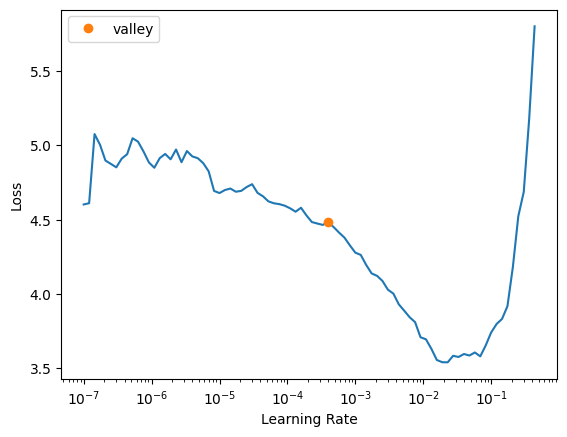

<Figure size 1000x600 with 0 Axes>

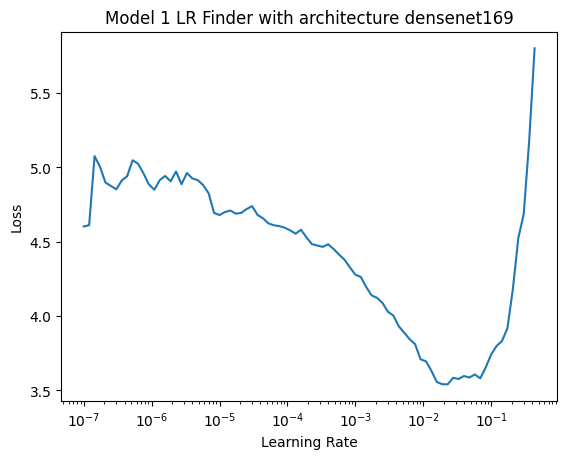

epoch,train_loss,valid_loss,accuracy,time
0,3.904638,2.568826,0.291339,00:46
1,2.352820,1.135314,0.708661,00:30
2,1.493247,0.703714,0.811024,00:29
3,0.927289,0.430902,0.881890,00:28
4,0.709132,0.337605,0.905512,00:28
5,0.582717,0.359078,0.905512,00:28
6,0.488311,0.309388,0.905512,00:28
7,0.364402,0.235925,0.913386,00:30
8,0.330369,0.302929,0.905512,00:28
9,0.233481,0.251233,0.921260,00:28


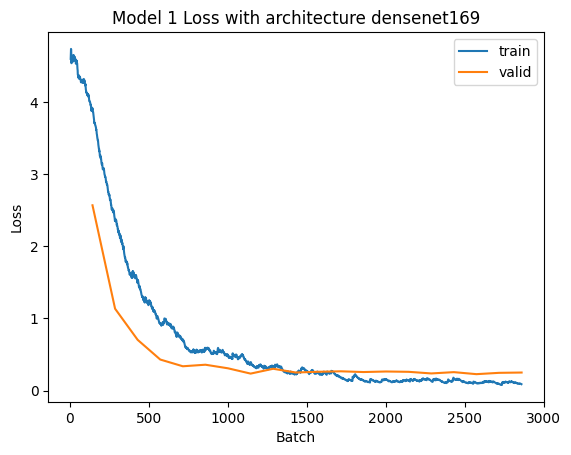

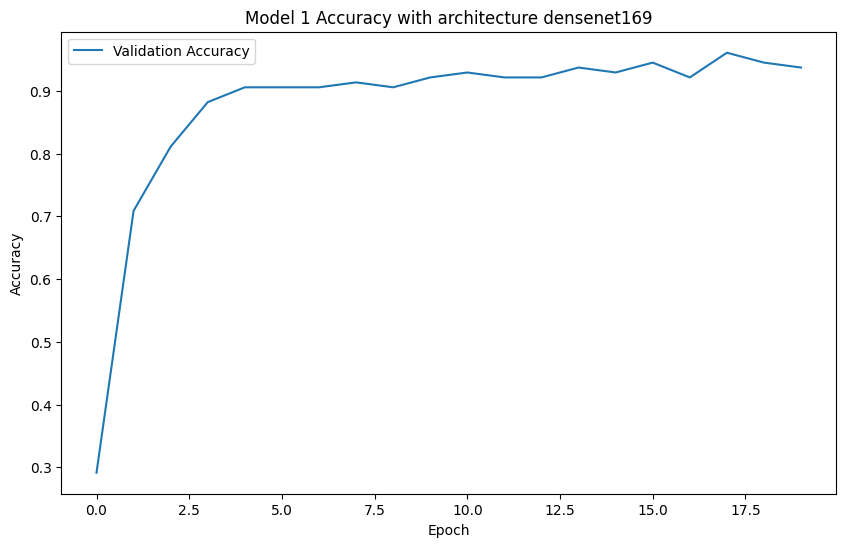

epoch,train_loss,valid_loss,accuracy,time
0,0.129111,0.251757,0.937008,00:37
1,0.094291,0.236403,0.944882,00:36
2,0.133705,0.248100,0.937008,00:37
3,0.130493,0.248755,0.929134,00:36
4,0.103128,0.257681,0.944882,00:36
5,0.152907,0.223155,0.944882,00:38
6,0.107502,0.258558,0.913386,00:37
7,0.088396,0.213347,0.968504,00:37
8,0.127224,0.233937,0.952756,00:37
9,0.094549,0.248810,0.937008,00:36


Training model 2 with architecture densenet201


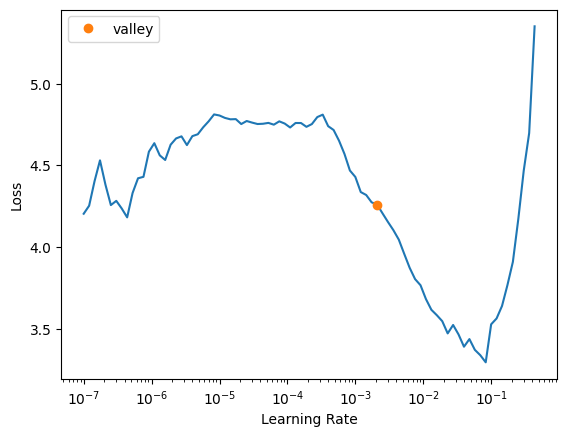

<Figure size 1000x600 with 0 Axes>

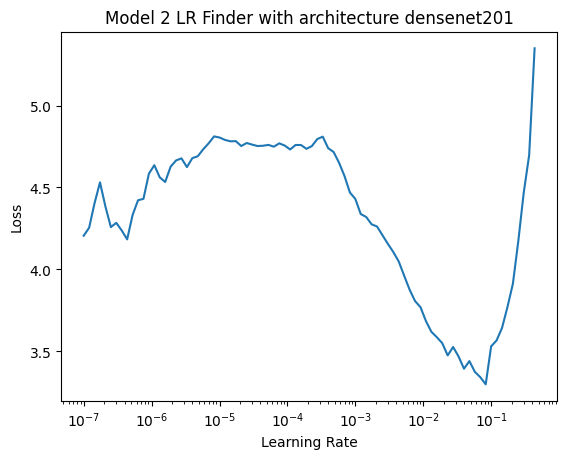

epoch,train_loss,valid_loss,accuracy,time
0,2.308142,0.894361,0.755906,00:35
1,1.192531,0.399623,0.874016,00:35
2,0.744498,0.389513,0.889764,00:34
3,0.661358,0.317190,0.897638,00:35
4,0.516154,0.430720,0.929134,00:36
5,0.537135,0.432391,0.874016,00:35
6,0.430503,0.333707,0.929134,00:36
7,0.283219,0.271574,0.921260,00:34
8,0.253729,0.267815,0.897638,00:36
9,0.152118,0.283101,0.921260,00:36


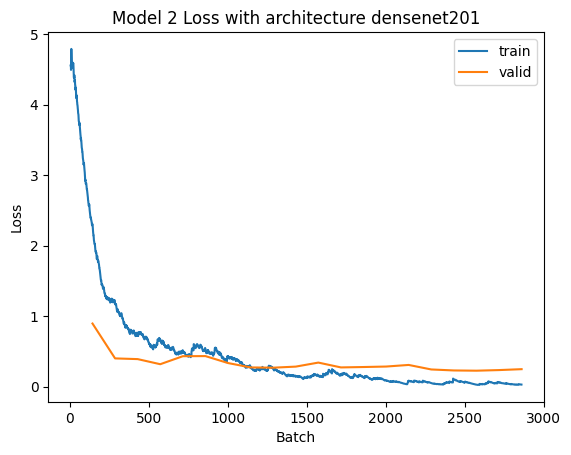

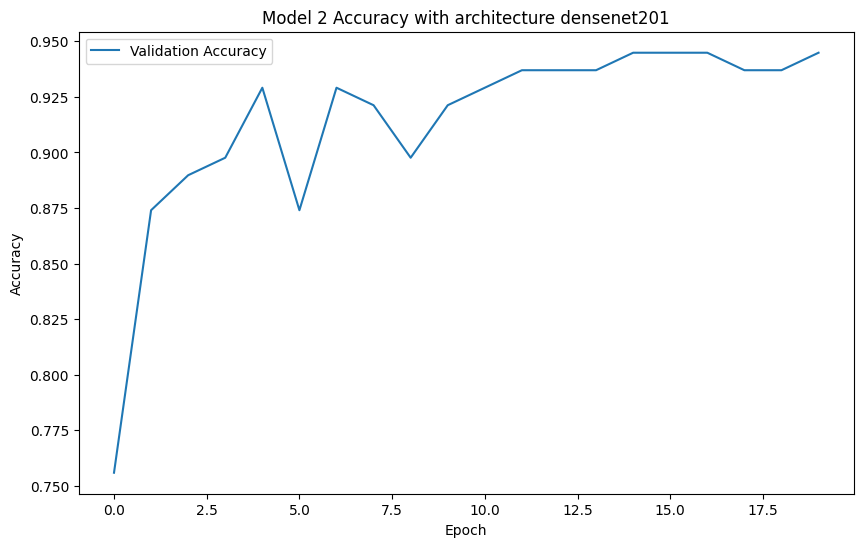

epoch,train_loss,valid_loss,accuracy,time
0,0.074160,0.258384,0.937008,00:44
1,0.032942,0.252466,0.944882,00:44
2,0.054659,0.245716,0.944882,00:43
3,0.031065,0.238254,0.944882,00:44
4,0.053830,0.242157,0.944882,00:44
5,0.042268,0.249898,0.937008,00:44
6,0.059276,0.233897,0.937008,00:44
7,0.031120,0.228624,0.952756,00:44
8,0.035934,0.223648,0.952756,00:45
9,0.034593,0.255648,0.944882,00:44


Training model 3 with architecture densenet161


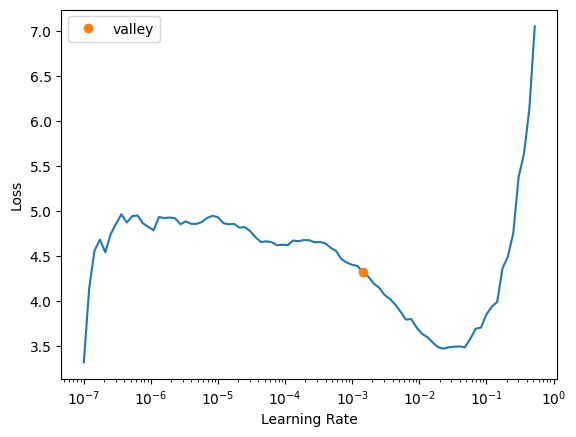

<Figure size 1000x600 with 0 Axes>

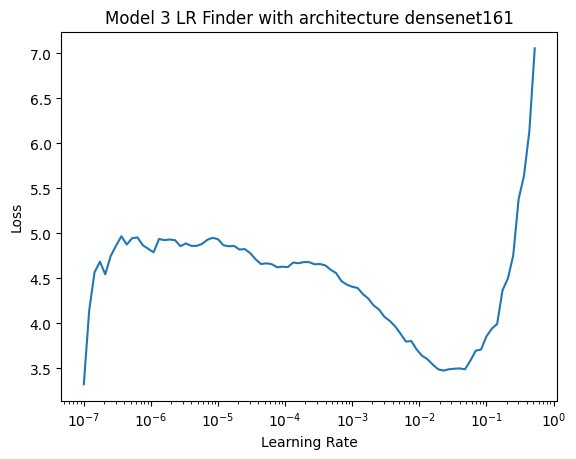

epoch,train_loss,valid_loss,accuracy,time
0,2.630035,1.112888,0.700787,00:33
1,1.433354,0.387852,0.905512,00:34
2,0.790201,0.384038,0.905512,00:33
3,0.590946,0.329998,0.897638,00:34
4,0.605096,0.402945,0.858268,00:33
5,0.402493,0.318691,0.889764,00:35
6,0.372624,0.130071,0.960630,00:33
7,0.237984,0.192094,0.944882,00:34
8,0.322276,0.194045,0.944882,00:34
9,0.145722,0.199917,0.921260,00:34


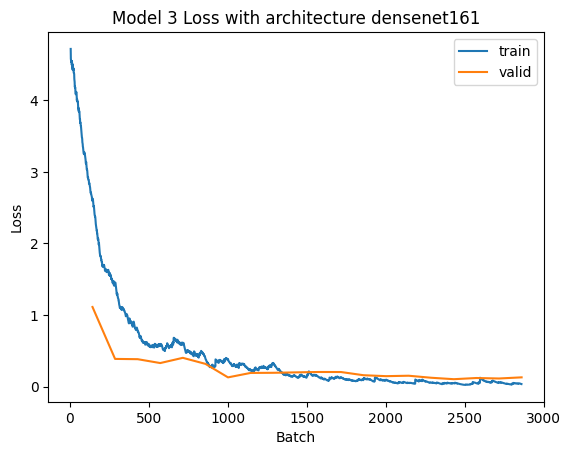

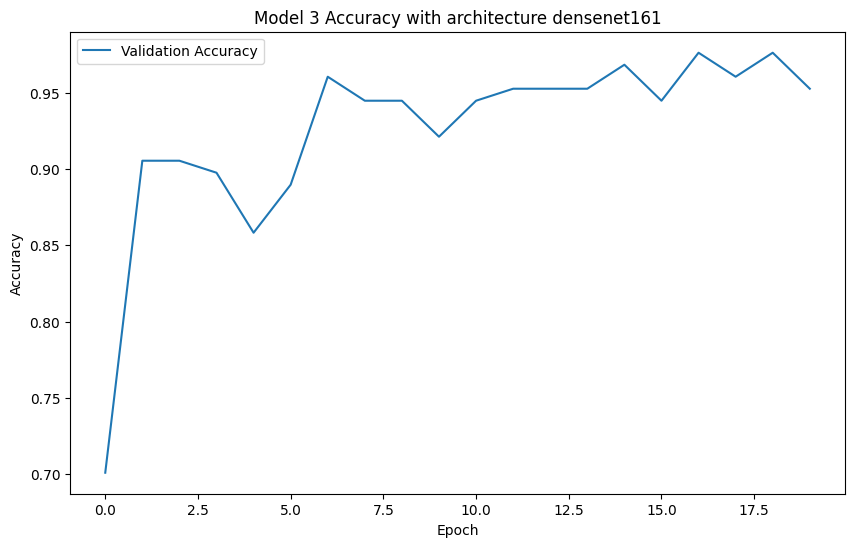

epoch,train_loss,valid_loss,accuracy,time
0,0.051109,0.122411,0.968504,00:44
1,0.074339,0.132072,0.952756,00:44
2,0.069184,0.126061,0.960630,00:45
3,0.038733,0.125608,0.960630,00:44
4,0.046558,0.120400,0.944882,00:45
5,0.060200,0.113015,0.960630,00:45
6,0.054192,0.124713,0.952756,00:44
7,0.033146,0.130285,0.952756,00:46
8,0.045333,0.133859,0.960630,00:44
9,0.024242,0.132074,0.968504,00:45


In [24]:
model_archs = [densenet169, densenet201, densenet161]

models = [cnn_learner(oversampled_data, arch, loss_func=nn.CrossEntropyLoss(weight=class_weights), metrics=accuracy) for arch in model_archs]


for i, model in enumerate(models):
    model.freeze()

    print(f"Training model {i+1} with architecture {model_archs[i].__name__}")
    lr_valley = model.lr_find().valley

    plt.figure(figsize=(10,6))
    model.recorder.plot_lr_find()
    plt.title(f'Model {i+1} LR Finder with architecture {model_archs[i].__name__}')
    plt.show()

    model.fit_one_cycle(20, lr_max=slice(lr_valley))

    model.recorder.plot_loss()
    plt.title(f'Model {i+1} Loss with architecture {model_archs[i].__name__}')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.show()

    plt.figure(figsize=(10,6))
    valid_acc = [x[2] for x in model.recorder.values] 
    plt.plot(valid_acc, label='Validation Accuracy')
    plt.title(f'Model {i+1} Accuracy with architecture {model_archs[i].__name__}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    model.unfreeze()

    lr_valley = lr_valley/100

    model.fit_one_cycle(20, lr_max=slice(lr_valley/100, lr_valley))

# Create submission

The following code is used to predict the classes for the test dataset, and generate the csv that is then uploaded to Kaggle.

In [25]:
test_items = get_image_files("/content/drive/MyDrive/DP4_final/test")
test_dl = dls.test_dl(test_items)

preds = [model.tta(dl=test_dl, n=64, use_max=False)[0] for model in models]

AttributeError: 'torch.return_types.max' object has no attribute 'argmax'

In [54]:
preds

[tensor([[ 3.4055,  1.4158,  1.7028,  ..., -0.7590, -0.7801, -1.6378],
         [-5.8871,  0.7996, -1.7720,  ..., -0.1991,  0.0889, -0.6593],
         [ 1.0472, -1.0827, -4.2507,  ..., -0.3989, -2.4401, -2.0463],
         ...,
         [-0.6496,  0.8962,  1.9564,  ..., -2.1973, -1.3265,  0.2650],
         [ 6.8233,  0.0697,  1.4407,  ..., -1.1149,  1.7301,  1.7081],
         [-0.6711,  2.1442,  1.7148,  ...,  0.8012, -3.8034, -0.6154]]),
 tensor([[ 3.1505, -2.2493,  1.1158,  ..., -0.4185, -1.2114, -1.1254],
         [-5.7504, -0.5712, -3.8331,  ...,  3.4763,  3.2220,  1.7111],
         [-2.4284, -6.9984, -1.1326,  ..., -2.4887, -0.2065, -2.8863],
         ...,
         [-1.6017,  3.1422, -0.0429,  ..., -3.8839,  0.1132, -2.2127],
         [ 6.1257,  0.4491, -0.8513,  ..., -4.8228, -1.4618, -0.5483],
         [-1.7186,  0.1110, -2.5852,  ..., -3.4158, -2.8450, -4.5457]]),
 tensor([[ 5.3280, -4.6363,  0.6296,  ..., -0.4094, -0.6861,  1.1280],
         [-7.2301, -0.7025, -6.5903,  ...,  3

In [53]:
max_preds = torch.max(torch.stack(preds), dim=0)[0]

max_indices = torch.argmax(max_preds, dim=-1)

class_labels = [dls.vocab[i] for i in max_indices]

image_ids = [item.stem for item in test_items]

submission_df = pd.DataFrame({'SOPInstanceUID': image_ids, 'Target': class_labels})

submission_df.to_csv('max_2.csv', index=False)

print("El archivo de presentación se ha escrito en 'max_2.csv'")

El archivo de presentación se ha escrito en 'max_2.csv'
